# IMPORTATION DES DONNEES ET CHARGEMENT DE LA LIBRAIRIE

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
from ipywidgets import interact

# les méthodes de prétraitement

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# les modeles de machine learning pour la situation

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

from sklearn.svm import SVC

from sklearn.metrics import  classification_report, accuracy_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('heart_disease.xlsx')

In [3]:
data = df.copy()

In [4]:
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [5]:
df.shape

(918, 12)

# PREPROCESSING 

Il n'y a pas de données manquantes dans ce jeu de données.
Nous allons donc nous intéresser à l'encodage des variables qualitatives, à la normalisation des variables quantitatives
et aux données abérrantes et cela par étapes avant d'aller à la modelisation pour chacun de ces cas jusqu'à trouver le bon modele 

- Encodage des variables qualitatives

In [6]:
def features_ordinal(dataframe,variable):
    '''Fonction permettant d'encoder les variables qualitatives ordinales
    :param dataframe:fournir le dataframe
    :param variable: fournir la liste de variable
    '''
    modalite={
        'femme':0,
        'homme':1,
        'AT':0,
        'AA':1,
        'DNA':2,
        'ASY':3,
        'Normal':0,
        'ST':1,
        'LVH':2,
        'Oui':1,
        'Non':0,
        'Ascendant':0,
        'Plat':1,
        'Descendant':2
        
    }
    for col in variable:
        if dataframe[col].dtype==object:
            dataframe.loc[:,col]=dataframe[col].map(modalite)

In [7]:
variable= df.select_dtypes(object).columns
features_ordinal(df,variable)
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,1,140,289,0,0,172,0,0.0,0,0
1,49,0,2,160,180,0,0,156,0,1.0,1,1
2,37,1,1,130,283,0,1,98,0,0.0,0,0
3,48,0,3,138,214,0,0,108,1,1.5,1,1
4,54,1,2,150,195,0,0,122,0,0.0,0,0


- Division du jeu de donnée en jeu d'apprentissage et de test

In [8]:
X=df.drop('CŒUR',axis=1)
y=df['CŒUR']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [9]:
y_train.value_counts()

1    406
0    328
Name: CŒUR, dtype: int64

On  a conservé les memes proportions pour la variable cible en test,entrainenment et validation

- Modelisation 1

In [10]:
# selection des variables 

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train,y_train)

accuracy_score(y_test,rf.predict(X_test))

0.907608695652174

In [11]:
print(rf.feature_importances_)

[0.07449733 0.02857452 0.12995175 0.06599451 0.10201219 0.02441361
 0.02408754 0.11410641 0.07415575 0.10282105 0.25938533]


In [12]:
vars_imp=pd.Series(rf.feature_importances_ , index=X_train.columns).sort_values(ascending=False)
vars_imp

PENTE          0.259385
TDT            0.129952
FCMAX          0.114106
DEPRESSION     0.102821
CHOLESTEROL    0.102012
AGE            0.074497
ANGINE         0.074156
PAR            0.065995
SEXE           0.028575
GAJ            0.024414
ECG            0.024088
dtype: float64

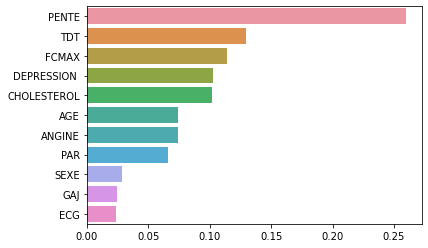

In [13]:
sb.barplot(x=vars_imp,y=vars_imp.index)
plt.show()

In [14]:
vars_non_imp=['GAJ','SEXE','ECG']

X_train = X_train.drop(vars_non_imp, axis=1)

X_test=X_test.drop(vars_non_imp, axis=1)

In [15]:
#Regression logistique

# lr= LogisticRegression(random_state=0)

# lr_hyp_param={'C': [0.001,0.01,0.1, 1.0, 10, 100] }

# lr_cv=GridSearchCV(lr, lr_hyp_param, cv = 5)

# lr_cv.fit(X_train,y_train)

# print(lr_cv.best_score_)
# print(lr_cv.best_estimator_)

In [16]:
# Foret aleatoire

RF=RandomForestClassifier(random_state=42)

params_RF = {"max_depth": [5,10,20,50,100,200],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2,3,5,7],
           "min_samples_leaf": [1, 3,5,6]}

RF_cv= GridSearchCV(RF, params_RF, cv = 5)

RF_cv.fit(X_train,y_train)

print(RF_cv.best_score_)

print(RF_cv.best_estimator_)

0.856937843630603
RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=7,
                       random_state=42)


In [17]:
# SVM
##from sklearn.svm import SVC
 
svc=SVC(random_state=42)

svc_params={'C':[0.1,1,10], 'kernel':['linear','rbf','poly']}

svc_cv=GridSearchCV(svc, svc_params , cv = 5)

svc_cv.fit(X_train,y_train)

print(svc_cv.best_score_)

print(svc_cv.best_estimator_)

0.8269313204733948
SVC(C=10, kernel='linear', random_state=42)


In [18]:
#bagging classifier

##from sklearn.ensemble import BaggingClassifier

bg=BaggingClassifier(random_state=42)

params_bg = {'n_estimators': [5,10,20,50,100,200]}

bg_cv= GridSearchCV(bg, params_bg, cv = 5)

bg_cv.fit(X_train,y_train)

print(bg_cv.best_score_)

print(bg_cv.best_estimator_)

0.8405833566303234
BaggingClassifier(n_estimators=5, random_state=42)


In [19]:
#Evaluation de la performance

def evaluation_model(model,features,labels):
    pred  = model.predict(features)
    score = accuracy_score(y_test,pred)
    print('Score globale du modèle:', round(score,3))

In [20]:
models=[bg_cv.best_estimator_,svc_cv.best_estimator_ ,RF_cv.best_estimator_]
for model in models:
    print('model ' + str(model))
    evaluation_model(model, X_test, y_test)
    print('='*90)

model BaggingClassifier(n_estimators=5, random_state=42)
Score globale du modèle: 0.793
model SVC(C=10, kernel='linear', random_state=42)
Score globale du modèle: 0.826
model RandomForestClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=7,
                       random_state=42)
Score globale du modèle: 0.875


In [21]:
def courbe_appentissage(model):
    
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=5,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.title(model, fontsize=24)
    plt.legend()
    print('='*90)

acc:  0.7934782608695652
acc:  0.8260869565217391
acc:  0.875


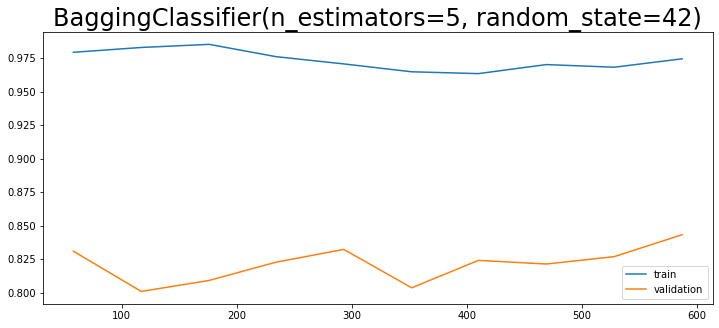

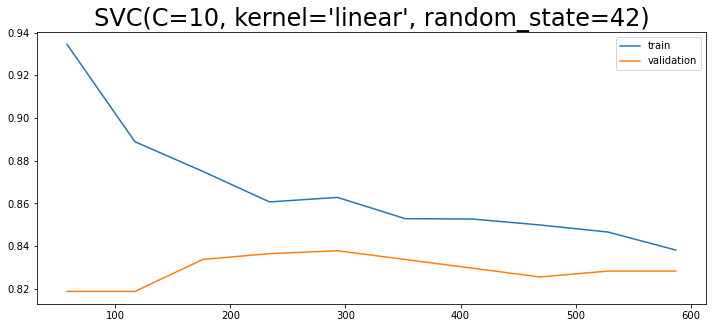

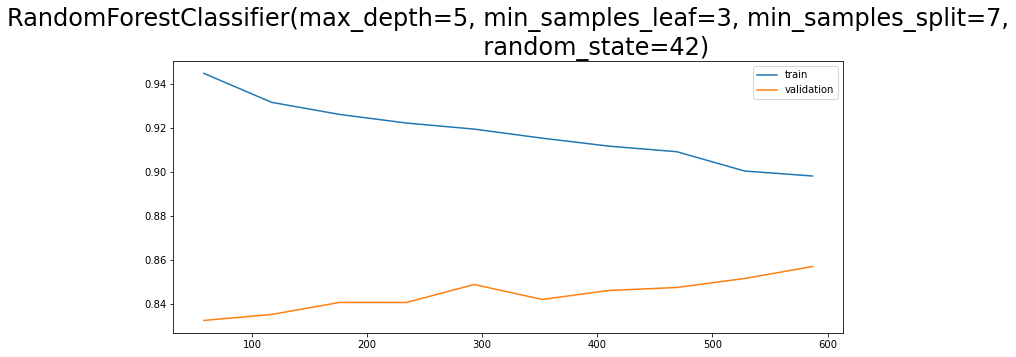

In [22]:
for model in models:
    courbe_appentissage(model)

- Modelisation 2

In [23]:
# Normalisons les données quantitatives

In [24]:
def decoupe(X):
    X_quant_cont = X.drop(columns=['TDT', 'ANGINE', 'PENTE'])
    X_quant_quali = X[['TDT', 'ANGINE', 'PENTE']]
    
    return X_quant_cont, X_quant_quali

In [25]:
X_train_cont, X_train_quali = decoupe(X_train)

In [26]:
X_train_cont.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
485,63,139,217,128,1.2
486,55,110,214,180,0.4
117,59,130,338,130,1.5
361,47,160,0,124,0.0
296,50,145,0,139,0.7


In [27]:
X_train_quali.head()

,TDT,ANGINE,PENTE
485,1,1,1
486,1,0,0
117,3,1,1
361,3,1,1
296,3,1,1


In [28]:
X_test_cont, X_test_quali = decoupe(X_test)

In [29]:
X_test_cont.head()

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION
356,46,115,0,113,1.5
763,58,132,224,173,3.2
817,60,125,258,141,2.8
735,49,120,188,139,2.0
892,39,138,220,152,0.0


In [30]:
X_test_quali.head()

,TDT,ANGINE,PENTE
356,3,1,1
763,2,0,0
817,3,1,1
735,2,0,1
892,2,0,1


In [31]:
scale = StandardScaler()

In [32]:
X_train_cont_norm = scale.fit_transform(X_train_cont)
X_test_cont_norm  = scale.transform(X_test_cont)

In [33]:
X_train_cont_norm=pd.DataFrame(X_train_cont_norm,columns=X_train_cont.columns,index=X_train_cont.index)

In [34]:
print(X_train_cont_norm.shape)
print(X_train_quali.shape)

(734, 5)
(734, 3)


In [35]:
df_train = pd.concat([X_train_cont_norm,X_train_quali],axis=1)
#X_train_quali

In [36]:
X_test_cont_norm=pd.DataFrame(X_test_cont_norm,columns=X_test_cont.columns,index=X_test_cont.index)

In [37]:
df_test = pd.concat([X_test_cont_norm,X_test_quali],axis=1)
df_test

,AGE,PAR,CHOLESTEROL,FCMAX,DEPRESSION,TDT,ANGINE,PENTE
356,-0.831954,-0.989299,-1.876035,-0.905584,0.601071,3,1,1
763,0.440022,-0.048409,0.191755,1.418673,2.210549,2,0,0
817,0.652018,-0.435834,0.505616,0.179069,1.831848,3,1,1
735,-0.513960,-0.712567,-0.140568,0.101594,1.074447,2,0,1
892,-1.573940,0.283669,0.154830,0.605183,-0.819056,2,0,1
...,...,...,...,...,...,...,...,...
52,-0.937952,0.394362,0.191755,-0.556946,-0.819056,1,0,0
752,0.228026,-0.435834,0.422535,0.295282,0.317046,3,1,1
492,-0.513960,-0.159102,-1.876035,0.334020,2.021198,0,0,1
622,0.546020,-1.266031,0.330223,0.217807,0.317046,3,1,1


In [38]:
df_test.isna().sum()

AGE            0
PAR            0
CHOLESTEROL    0
FCMAX          0
DEPRESSION     0
TDT            0
ANGINE         0
PENTE          0
dtype: int64

In [39]:
RF=RandomForestClassifier(random_state=42)

params_RF = {"max_depth": [5,10,20,50,100,200],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2,3,5,7],
           "min_samples_leaf": [1, 3,5,6]}

RF_cv= GridSearchCV(RF, params_RF, cv = 5)

RF_cv.fit(df_train,y_train)

print(RF_cv.best_score_)

print(RF_cv.best_estimator_)

0.8555866182089273
RandomForestClassifier(max_depth=10, min_samples_leaf=6, random_state=42)


In [40]:
# SVM
##from sklearn.svm import SVC
 
svc=SVC(random_state=42)

svc_params={'C':[0.1,1,10], 'kernel':['linear','rbf','poly']}

svc_cv=GridSearchCV(svc, svc_params , cv = 5)

svc_cv.fit(df_train,y_train)

print(svc_cv.best_score_)

print(svc_cv.best_estimator_)

0.8446836268754077
SVC(C=1, random_state=42)


In [41]:
#bagging classifier

##from sklearn.ensemble import BaggingClassifier

bg=BaggingClassifier(random_state=42)

params_bg = {'n_estimators': [5,10,20,50,100,200]}

bg_cv= GridSearchCV(bg, params_bg, cv = 5)

bg_cv.fit(df_train,y_train)

print(bg_cv.best_score_)

print(bg_cv.best_estimator_)

0.8378343118069145
BaggingClassifier(n_estimators=50, random_state=42)


In [42]:
 #Regression logistique

lr= LogisticRegression(random_state=0)

lr_hyp_param={'C': [0.001,0.01,0.1, 1.0, 10, 100] }

lr_cv=GridSearchCV(lr, lr_hyp_param, cv = 5)

lr_cv.fit(df_train,y_train)

print(lr_cv.best_score_)
print(lr_cv.best_estimator_)

0.843295126269686
LogisticRegression(C=10, random_state=0)


In [43]:
#Evaluation de la performance

def evaluation_model(model,features,labels):
    pred  = model.predict(features)
    score = accuracy_score(y_test,pred)
    print('Score globale du modèle:', round(score,3))

In [44]:
models = [bg_cv.best_estimator_,svc_cv.best_estimator_ ,RF_cv.best_estimator_]
for model in models:
    print('model ' + str(model))
    evaluation_model(model, df_test, y_test)
    print('='*90)

model BaggingClassifier(n_estimators=50, random_state=42)
Score globale du modèle: 0.842
model SVC(C=1, random_state=42)
Score globale du modèle: 0.859
model RandomForestClassifier(max_depth=10, min_samples_leaf=6, random_state=42)
Score globale du modèle: 0.853


In [45]:
def courbe_appentissage(model):
    
    model.fit(df_train, y_train)
    predicted = model.predict(df_test)
      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    
    N, train_score, val_score = learning_curve(model, df_train, y_train,
                                               cv=5,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.title(model, fontsize=24)
    plt.legend()
    print('='*90)

acc:  0.842391304347826
acc:  0.8586956521739131
acc:  0.8532608695652174


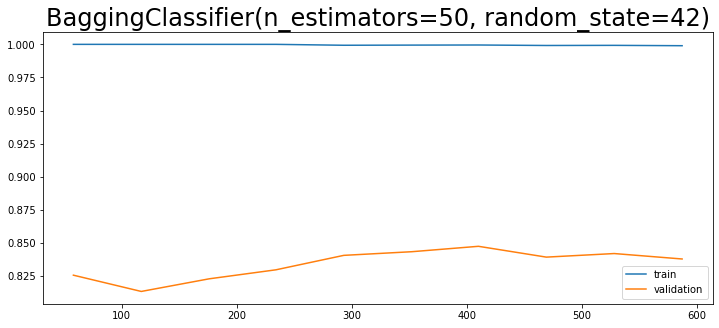

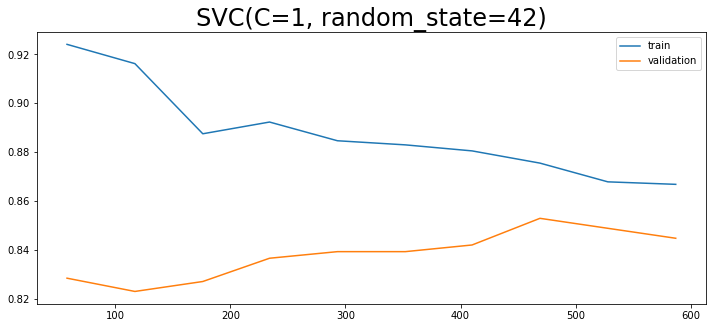

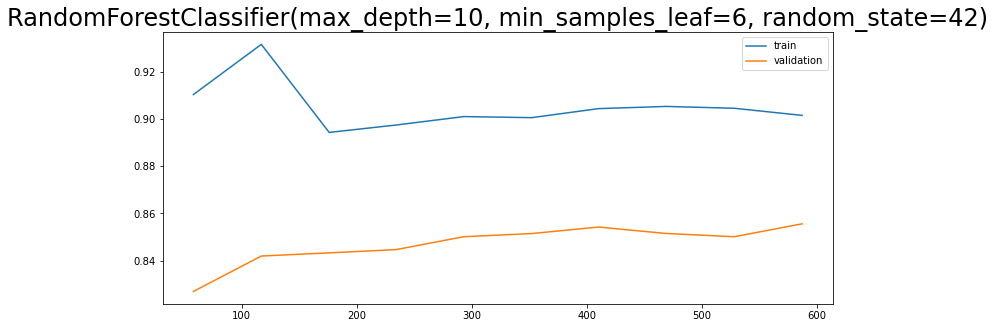

In [46]:
for model in models:
    courbe_appentissage(model)

In [47]:
# Réévaluons le modeles la methode RobustScaler et minmax

In [48]:
def normaliseur(normal):
    X_train_cont_norm = normal.fit_transform(X_train_cont)
    X_test_cont_norm  = normal.transform(X_test_cont)
    X_train_cont_norm=pd.DataFrame(X_train_cont_norm,columns=X_train_cont.columns,index=X_train_cont.index)
    df_train = pd.concat([X_train_cont_norm,X_train_quali],axis=1)
    X_test_cont_norm=pd.DataFrame(X_test_cont_norm,columns=X_test_cont.columns,index=X_test_cont.index)
    df_test = pd.concat([X_test_cont_norm,X_test_quali],axis=1)
    return df_test,df_train

In [49]:
df_test,df_train=normaliseur(RobustScaler())

In [50]:
for model in models:
    model.fit(df_train,y_train)
    predicted = model.predict(df_test)      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    print(90*'=')

acc:  0.842391304347826
acc:  0.8369565217391305
acc:  0.8586956521739131


In [51]:
def courbe_appentissage(model):
    
    model.fit(df_train, y_train)
    predicted = model.predict(df_test)
      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    
    N, train_score, val_score = learning_curve(model, df_train, y_train,
                                               cv=5,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.title(model, fontsize=24)
    plt.legend()
    print('='*90)

acc:  0.842391304347826
acc:  0.8369565217391305
acc:  0.8586956521739131


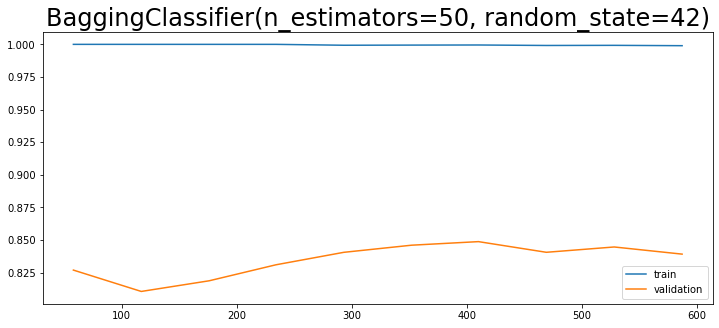

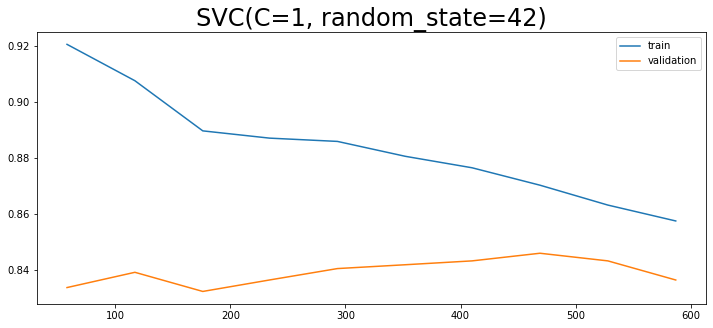

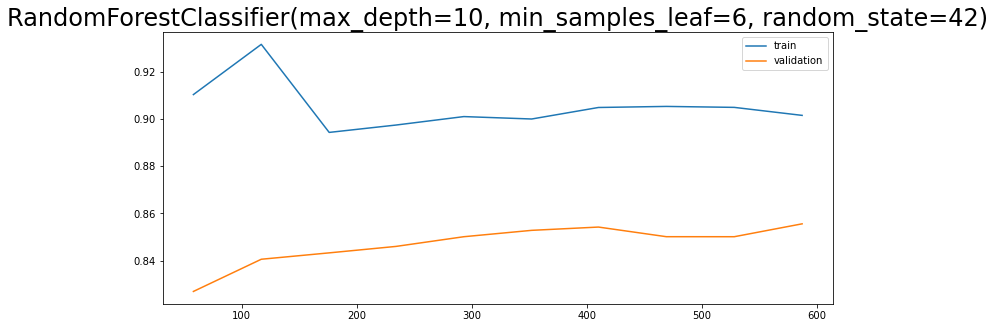

In [52]:
for model in models:
    courbe_appentissage(model)

In [53]:
df_test,df_train=normaliseur(MinMaxScaler())

In [54]:
for model in models:
    model.fit(df_train,y_train)
    predicted = model.predict(df_test)      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    print(90*'=')

acc:  0.842391304347826
acc:  0.8097826086956522
acc:  0.8532608695652174


In [55]:
def courbe_appentissage(model):
    
    model.fit(df_train, y_train)
    predicted = model.predict(df_test)
      
    acc=accuracy_score(y_test, predicted)
    print('acc: ', acc)
    
    N, train_score, val_score = learning_curve(model, df_train, y_train,
                                               cv=5,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 5))
    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.title(model, fontsize=24)
    plt.legend()
    print('='*90)

acc:  0.842391304347826
acc:  0.8097826086956522
acc:  0.8532608695652174


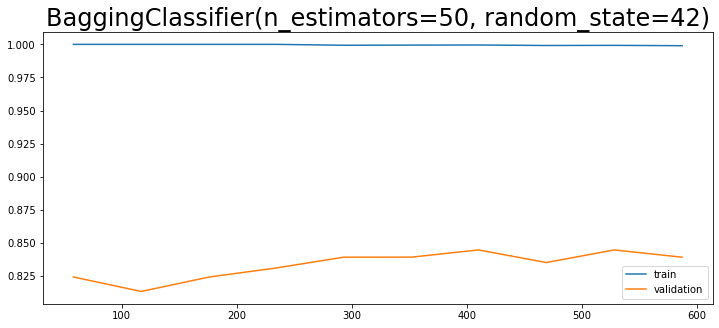

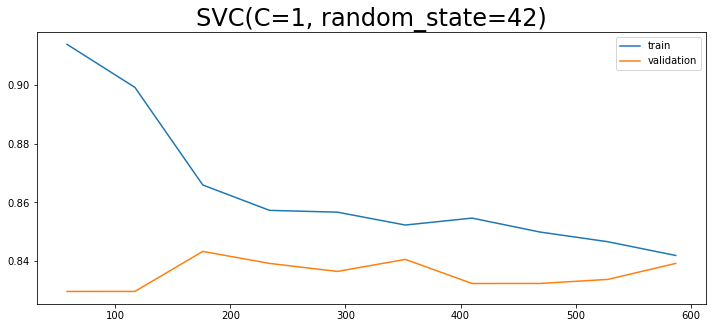

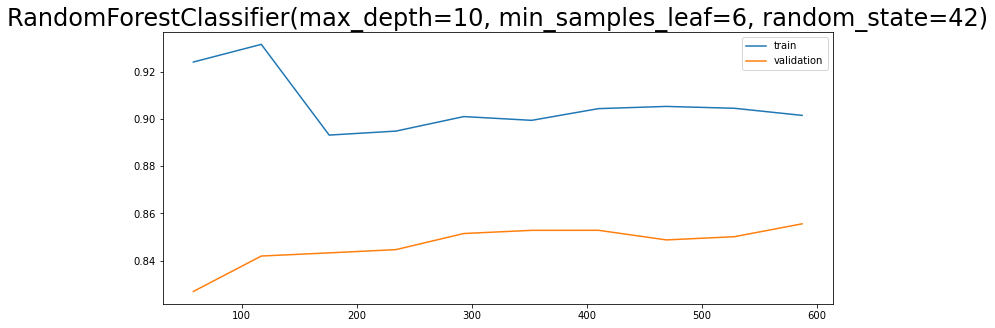

In [56]:
for model in models:
    courbe_appentissage(model)

le modele le plus performant en terme de taux de bien classé avec une meilleur stabilité est celui de randomforest lorqu'on ne fait aucune forme de  normalisation avec un pourcentage de 87.5%